In [10]:
import pandas as pd
import numpy as np
import random
import pickle
import warnings

from sklearn.inspection import permutation_importance
from data_preparation_tools import preprocessing_data

from cv_wrappers_and_tools_RF import cv_random_forest, make_prediction_rf
from common_tools import save_model_and_results, plot_roc_auc

warnings.filterwarnings("ignore", category=UserWarning)

# RandomForest

## Grid search

In [11]:
df_train = pd.read_csv('input/cybersecurity_training.csv', sep='|', index_col=0)
df_test = pd.read_csv('input/cybersecurity_test.csv', sep='|', index_col=0)
print(df_train.shape)
print(df_test.shape)
df_train.head()

(39427, 62)
(20000, 61)


client_code  notified categoryname            ip ipcategory_name  \
alert_ids                                                                    
Nhq               DPM         0       Attack   YT.LB.32.21        INTERNET   
XZt               FIN         0      Exploit  192.SL.UK.94        PRIV-192   
bBz               CHP         0       Attack   YT.LB.38.21        INTERNET   
ZNr               HPS         0       Attack   JX.NY.13.20        INTERNET   
poV               OSC         0       Attack   YT.LB.32.21        INTERNET   

          ipcategory_scope  parent_category grandparent_category  \
alert_ids                                                          
Nhq               Internet                7                    A   
XZt        Private network                1                    A   
bBz               Internet                7                    A   
ZNr               Internet                7                    A   
poV               Internet                7                    A   

           overallseverity  timestamp_dist  ...  thrcnt_week  thrcnt_day  p6  \
alert_ids                                   ...                                
Nhq                      3           65684  ...         4160         675   1   
XZt                      5         1188030  ...            9           2   4   
bBz                      4           43716  ...         3788         628   1   
ZNr                      4               0  ...          565          96   0   
poV                      4            2401  ...         2790         632   1   

           p9  p5m  p5w  p5d  p8m  p8w  p8d  
alert_ids                                    
Nhq         0    2    1    1    1    1    1  
XZt        12    3    2    2    2    1    1  
bBz         0    2    2    1    2    2    1  
ZNr         0    2    2    2    2    2    2  
poV         0    1    1    1    1    1    1  

[5 rows x 62 columns]

Let's make a first prediction with default parameters and simple preprocessed data.

In [12]:
# Select features, that won't be used to create predictive models
feature_black_list = ['grandparent_category', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'score']
features_for_preprocessing = {"feature_black_list": feature_black_list}
# Select target variable
target = 'notified'
# Prepare  training and test datasets for modeling
preproc_train_df, preproc_test_df, _, features = preprocessing_data(df_train, df_test, target, features_for_preprocessing)

In [13]:
# The first training model with default parameters
trainResults, testResults, *_ = cv_random_forest(preproc_train_df, target, features, debug=True)
print(f'Train mean: {np.mean(trainResults)}, Test mean: {np.mean(testResults)}, Diff: {np.mean(trainResults) - np.mean(testResults)}')

/home/michail/DS/DataspellProjects/Suspicious_network_event_recognition/cv_wrappers_and_tools_RF.py:48: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  for train, test in skf.split(train_df[features], train_df[target]):
/home/michail/DS/DataspellProjects/Suspicious_network_event_recognition/cv_wrappers_and_tools_RF.py:54: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  clf.fit(train_df.iloc[train][features], train_df.iloc[train][target])


RandomForestClassifier(n_jobs=-1, random_state=2022)


/home/michail/DS/DataspellProjects/Suspicious_network_event_recognition/cv_wrappers_and_tools_RF.py:58: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  preds_train = clf.predict_proba(train_df.iloc[train][features])[:, 1]
/home/michail/DS/DataspellProjects/Suspicious_network_event_recognition/cv_wrappers_and_tools_RF.py:59: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  preds = clf.predict_proba(train_df.iloc[test][features])[:, 1]


Train AUC: 0.9995847847344019 Valid AUC: 0.8538707020338024
RandomForestClassifier(n_jobs=-1, random_state=2022)


/home/michail/DS/DataspellProjects/Suspicious_network_event_recognition/cv_wrappers_and_tools_RF.py:54: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  clf.fit(train_df.iloc[train][features], train_df.iloc[train][target])
/home/michail/DS/DataspellProjects/Suspicious_network_event_recognition/cv_wrappers_and_tools_RF.py:58: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  preds_train = clf.predict_proba(train_df.iloc[train][features])[:, 1]
/home/michail/DS/DataspellProjects/Suspicious_network_event_recognition/cv_wrappers_and_tools_RF.py:59: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  preds = clf.predict_proba(train_df.iloc[test][features])[:, 1]
/home/michail/DS/DataspellProjects/Suspicious_network_event_recognition/cv_wrappers_and_tools_RF.py:54: FutureWarning: Passing a dict as 

Train AUC: 0.9994961105312372 Valid AUC: 0.8730155427262637
RandomForestClassifier(n_jobs=-1, random_state=2022)


/home/michail/DS/DataspellProjects/Suspicious_network_event_recognition/cv_wrappers_and_tools_RF.py:58: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  preds_train = clf.predict_proba(train_df.iloc[train][features])[:, 1]
/home/michail/DS/DataspellProjects/Suspicious_network_event_recognition/cv_wrappers_and_tools_RF.py:59: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  preds = clf.predict_proba(train_df.iloc[test][features])[:, 1]
/home/michail/DS/DataspellProjects/Suspicious_network_event_recognition/cv_wrappers_and_tools_RF.py:54: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  clf.fit(train_df.iloc[train][features], train_df.iloc[train][target])


Train AUC: 0.9995071684513309 Valid AUC: 0.8769764690222295
RandomForestClassifier(n_jobs=-1, random_state=2022)


/home/michail/DS/DataspellProjects/Suspicious_network_event_recognition/cv_wrappers_and_tools_RF.py:58: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  preds_train = clf.predict_proba(train_df.iloc[train][features])[:, 1]
/home/michail/DS/DataspellProjects/Suspicious_network_event_recognition/cv_wrappers_and_tools_RF.py:59: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  preds = clf.predict_proba(train_df.iloc[test][features])[:, 1]


Train AUC: 0.9995326664282053 Valid AUC: 0.8627679588244864
RandomForestClassifier(n_jobs=-1, random_state=2022)


/home/michail/DS/DataspellProjects/Suspicious_network_event_recognition/cv_wrappers_and_tools_RF.py:54: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  clf.fit(train_df.iloc[train][features], train_df.iloc[train][target])
/home/michail/DS/DataspellProjects/Suspicious_network_event_recognition/cv_wrappers_and_tools_RF.py:58: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  preds_train = clf.predict_proba(train_df.iloc[train][features])[:, 1]
/home/michail/DS/DataspellProjects/Suspicious_network_event_recognition/cv_wrappers_and_tools_RF.py:59: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  preds = clf.predict_proba(train_df.iloc[test][features])[:, 1]


Train AUC: 0.9995334054999985 Valid AUC: 0.8807352136423467
Train mean: 0.9995308271290348, Test mean: 0.8694731772498259, Diff: 0.13005764987920898


In [7]:
# Trying to find the best hyperparameters using Grid Search
for n_estimators in range(100, 601, 100):
    trainResults, testResults, *_ = cv_random_forest(train_df=preproc_train_df, features=features, target=target, n_estimators=n_estimators)
    print(f'n_estimators: {n_estimators}, Train mean: {np.mean(trainResults)}, Test mean: {np.mean(testResults)}, Diff: {np.mean(trainResults) - np.mean(testResults)}')

n_estimators: 100, Train mean: 1.0, Test mean: 0.9213885377144422, Diff: 0.07861146228555782
n_estimators: 200, Train mean: 1.0, Test mean: 0.9250760807950451, Diff: 0.07492391920495489
n_estimators: 300, Train mean: 1.0, Test mean: 0.9261972784126007, Diff: 0.07380272158739931
n_estimators: 400, Train mean: 1.0, Test mean: 0.92655364130206, Diff: 0.07344635869794003
n_estimators: 500, Train mean: 1.0, Test mean: 0.9269326274049451, Diff: 0.07306737259505491
n_estimators: 600, Train mean: 1.0, Test mean: 0.9270540295356657, Diff: 0.07294597046433426


In [13]:
for n_estimators in range(600, 1101, 100):
    trainResults, testResults, *_ = cv_random_forest(train_df=preproc_train_df, features=features, target=target, n_estimators=n_estimators)
    print(f'n_estimators: {n_estimators}, Train mean: {np.mean(trainResults):.3f}, Test mean: {np.mean(testResults):.3f}, Diff: {(np.mean(trainResults) - np.mean(testResults)):.3f}')

n_estimators: 600, Train mean: 1.000, Test mean: 0.927, Diff: 0.073
n_estimators: 700, Train mean: 1.000, Test mean: 0.927, Diff: 0.073
n_estimators: 800, Train mean: 1.000, Test mean: 0.928, Diff: 0.072
n_estimators: 900, Train mean: 1.000, Test mean: 0.928, Diff: 0.072
n_estimators: 1000, Train mean: 1.000, Test mean: 0.928, Diff: 0.072


KeyboardInterrupt: 

In [14]:
for max_depth in range(14,28,2):
    trainResults, testResults, *_ = cv_random_forest(train_df=preproc_train_df, features=features, target=target, n_estimators=800, max_depth=max_depth)
    print(f'max_depth: {max_depth}, Train mean: {np.mean(trainResults):.3f}, Test mean: {np.mean(testResults):.3f}, Diff: {(np.mean(trainResults) - np.mean(testResults)):.3f}')

max_depth: 14, Train mean: 0.997, Test mean: 0.919, Diff: 0.079
max_depth: 16, Train mean: 1.000, Test mean: 0.923, Diff: 0.077
max_depth: 18, Train mean: 1.000, Test mean: 0.925, Diff: 0.075
max_depth: 20, Train mean: 1.000, Test mean: 0.927, Diff: 0.073
max_depth: 22, Train mean: 1.000, Test mean: 0.928, Diff: 0.072
max_depth: 24, Train mean: 1.000, Test mean: 0.927, Diff: 0.073
max_depth: 26, Train mean: 1.000, Test mean: 0.928, Diff: 0.072


In [6]:
for max_features in range(7, 16, 1):
    trainResults, testResults, *_ = cv_random_forest(train_df=preproc_train_df, features=features, target=target, n_estimators=800, max_depth=26, max_features=max_features)
    print(f'max_features: {max_features}, Train mean: {np.mean(trainResults):.3f}, Test mean: {np.mean(testResults):.3f}, Diff: {(np.mean(trainResults) - np.mean(testResults)):.3f}')

max_features: 7, Train mean: 1.000, Test mean: 0.928, Diff: 0.072
max_features: 8, Train mean: 1.000, Test mean: 0.928, Diff: 0.072
max_features: 9, Train mean: 1.000, Test mean: 0.927, Diff: 0.073
max_features: 10, Train mean: 1.000, Test mean: 0.928, Diff: 0.072
max_features: 11, Train mean: 1.000, Test mean: 0.928, Diff: 0.072
max_features: 12, Train mean: 1.000, Test mean: 0.928, Diff: 0.072
max_features: 13, Train mean: 1.000, Test mean: 0.927, Diff: 0.073
max_features: 14, Train mean: 1.000, Test mean: 0.928, Diff: 0.072
max_features: 15, Train mean: 1.000, Test mean: 0.928, Diff: 0.072


In [7]:
for min_samples_split in [2, 3, 4, 5, 6, 8, 10, 15, 20, 30]:
    trainResults, testResults, *_ = cv_random_forest(train_df=preproc_train_df, features=features, target=target, n_estimators=800, max_depth=26, max_features=11, min_samples_split=min_samples_split)
    print(f'min_samples_split: {min_samples_split}, Train mean: {np.mean(trainResults):.3f}, Test mean: {np.mean(testResults):.3f}, Diff: {(np.mean(trainResults) - np.mean(testResults)):.3f}')

min_samples_split: 2, Train mean: 1.000, Test mean: 0.928, Diff: 0.072
min_samples_split: 3, Train mean: 1.000, Test mean: 0.928, Diff: 0.072
min_samples_split: 4, Train mean: 1.000, Test mean: 0.927, Diff: 0.073
min_samples_split: 5, Train mean: 1.000, Test mean: 0.926, Diff: 0.074
min_samples_split: 6, Train mean: 1.000, Test mean: 0.927, Diff: 0.073
min_samples_split: 8, Train mean: 1.000, Test mean: 0.925, Diff: 0.075
min_samples_split: 10, Train mean: 1.000, Test mean: 0.925, Diff: 0.075
min_samples_split: 15, Train mean: 0.999, Test mean: 0.923, Diff: 0.076
min_samples_split: 20, Train mean: 0.997, Test mean: 0.921, Diff: 0.076
min_samples_split: 30, Train mean: 0.993, Test mean: 0.918, Diff: 0.075


In [46]:
# Final model with hyperparameters that were found by Grid Search
trainResults, testResults, predictions, indexes, models = cv_random_forest(preproc_train_df, target, features, debug=True, mlflow_tracking=True, exp_name='Experiment_1_RF', n_estimators=800, max_depth=26, max_features=11, min_samples_split=3, min_samples_leaf = 1)
print(f'Train mean: {np.mean(trainResults):.3f}, Test mean: {np.mean(testResults):.3f}, Diff: {(np.mean(trainResults) - np.mean(testResults)):.3f}')

RandomForestClassifier(max_depth=26, max_features=11, min_samples_split=3,
                       n_estimators=800, n_jobs=-1, random_state=2022)
Train AUC: 1.0 Valid AUC: 0.9214425461498534
RandomForestClassifier(max_depth=26, max_features=11, min_samples_split=3,
                       n_estimators=800, n_jobs=-1, random_state=2022)
Train AUC: 1.0 Valid AUC: 0.9316546539633066
RandomForestClassifier(max_depth=26, max_features=11, min_samples_split=3,
                       n_estimators=800, n_jobs=-1, random_state=2022)
Train AUC: 1.0 Valid AUC: 0.932556313135048
RandomForestClassifier(max_depth=26, max_features=11, min_samples_split=3,
                       n_estimators=800, n_jobs=-1, random_state=2022)
Train AUC: 1.0 Valid AUC: 0.9272665020040526
RandomForestClassifier(max_depth=26, max_features=11, min_samples_split=3,
                       n_estimators=800, n_jobs=-1, random_state=2022)
Train AUC: 1.0 Valid AUC: 0.9261591705737062
Train mean: 1.000, Test mean: 0.928, Diff: 0.0

In [47]:
# Save results to file
modelRF= {
    "name":"RF-2_GS",
    "description":"Model Random Forest",
    "specification":'n_estimators=800, max_depth=26, max_features=11, min_samples_split=3, min_samples_leaf = 1',
    "trainResults":trainResults.copy(),
    "testResults":testResults.copy(),
    "predictions":predictions.copy(),
    "indices":indexes.copy(),
    "features": features.copy()
}
save_model_and_results('model_RF_2', modelRF)

## Features importance

In [10]:
# Checking which parameters have the highest and lowest predictive power
imps = list(zip(models[0].feature_importances_, features))
imps.sort(reverse=True)
imps

[(0.09327166308777758, 'ip'),
 (0.0765717808423343, 'thrcnt_month'),
 (0.07501511280383924, 'client_code'),
 (0.07246224195185441, 'thrcnt_week'),
 (0.06172739527002609, 'timestamp_dist'),
 (0.0539159947130435, 'start_minute'),
 (0.05319980162480642, 'start_second'),
 (0.05025783537438015, 'start_hour'),
 (0.05001424381825098, 'thrcnt_day'),
 (0.04994486367179078, 'correlatedcount'),
 (0.03732707673133568, 'categoryname'),
 (0.032267380209864506, 'weekday'),
 (0.021695975401261624, 'untrustscore'),
 (0.020412143732095024, 'flowscore'),
 (0.015694700189062098, 'srcipcategory_dominate'),
 (0.015290099524540985, 'srcport_cd'),
 (0.014671430210779955, 'overallseverity'),
 (0.012586640294484596, 'p8m'),
 (0.011915333283625472, 'dstip_cd'),
 (0.01188817652985421, 'p5m'),
 (0.0112185220834468, 'ipcategory_name'),
 (0.009810415157257599, 'p8w'),
 (0.009751031920101834, 'srcportcategory_dominate'),
 (0.009577650064221213, 'enforcementscore'),
 (0.009561418945441115, 'p5w'),
 (0.0084480222431476

In [ ]:
r = permutation_importance(models[0], preproc_train_df[features], preproc_train_df[target], n_repeats=10,random_state=0, scoring='roc_auc')
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{features[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

## Random Search

In [ ]:
# Trying to find the best hyperparameters using Random Search
results = []
for k in range(1000):

    params = {
        "max_depth": random.randint(6, 28),
        "max_features": random.randint(2, 12),
        "min_samples_split": random.randint(2, 9),
        "n_estimators": random.choice(range(100, 1001, 25))
    }
    # The value of min_samples_leaf must be less than min_samples_split
    params["min_samples_leaf"] = random.randint(1, params["min_samples_split"])

    # Model estimation for drawn hyperparameters
    trainResults, testResults, predictions, indexes, _ = cv_random_forest(preproc_train_df, target, features,
                                                                          debug=False, mlflow_tracking=True,
                                                                          exp_name='Experiment_2_RF_Random_Search',
                                                                          n_estimators=params["n_estimators"],
                                                                          max_depth=params["max_depth"],
                                                                          max_features=params["max_features"],
                                                                          min_samples_split=params["min_samples_split"],
                                                                          min_samples_leaf=params["min_samples_leaf"])

    # Saving results
    results.append((np.mean(testResults), params.copy()))

    # Display results of current iteration
    print(params, np.mean(testResults))

    # Every 10 iterations display top 3 results from all iterations
    if k>1 and k%10==0:
        print("\n Top 3:")
        for score, params in sorted(results, key=lambda x: x[0], reverse=True)[0:3]:
            print(params, score)
        print()

{'max_depth': 21, 'max_features': 3, 'min_samples_split': 3, 'n_estimators': 875, 'min_samples_leaf': 1} 0.922610582420945
{'max_depth': 17, 'max_features': 6, 'min_samples_split': 7, 'n_estimators': 275, 'min_samples_leaf': 1} 0.92034520867946
{'max_depth': 24, 'max_features': 7, 'min_samples_split': 4, 'n_estimators': 850, 'min_samples_leaf': 3} 0.923934444542571
{'max_depth': 25, 'max_features': 3, 'min_samples_split': 7, 'n_estimators': 100, 'min_samples_leaf': 5} 0.9087506522871422
{'max_depth': 18, 'max_features': 12, 'min_samples_split': 2, 'n_estimators': 700, 'min_samples_leaf': 2} 0.9256446771673611
{'max_depth': 28, 'max_features': 8, 'min_samples_split': 6, 'n_estimators': 425, 'min_samples_leaf': 3} 0.9242014097122817
{'max_depth': 14, 'max_features': 7, 'min_samples_split': 7, 'n_estimators': 950, 'min_samples_leaf': 3} 0.917934294317275
{'max_depth': 24, 'max_features': 11, 'min_samples_split': 8, 'n_estimators': 800, 'min_samples_leaf': 3} 0.9249018999667064
{'max_depth

### Making final prediction

Let's make a prediction with the parameters found by Random Search and with data, that was preprocessed using One Hot Encoding method.

In [16]:
df_train = pd.read_csv('input/cybersecurity_training.csv', sep='|', index_col=0)
df_test = pd.read_csv('input/cybersecurity_test.csv', sep='|', index_col=0)

# Set number of main categories in each categorical variable.
categorical_features = [
    ("categoryname", 7),
    ("ipcategory_name", 5),
    ("ipcategory_scope", 2),
    ("dstipcategory_dominate", 4),
    ("srcipcategory_dominate", 4)
]

numeric_categorical_features = [
    ("parent_category", 2),
    ("overallseverity", 3),
    ("alerttype_cd", 3),
    ("direction_cd", 2),
    ("eventname_cd", 4),
    ("severity_cd", 3),
    ("devicetype_cd", 2),
    ("devicevendor_cd", 2),
    ("srcipcategory_cd", 3),
    ("dstipcategory_cd", 2),
    ("trustscore", 2),
    ("dstportcategory_dominate", 3),
    ("username_cd", 8),
    ("protocol_cd", 4),
    ("reportingdevice_cd", 5),
    ("dstport_cd", 5),
    ("srcport_cd", 10),
    ("dstip_cd", 6),
    ("srcip_cd", 10),
    ("p6", 3),
    ("p9", 1),
    ("p5m", 3),
    ("p5w", 2),
    ("p5d", 2),
    ("p8w", 2),
    ("p8m", 3),
    ("p8d", 2)
]
# Select numeric continue feature for normalisation.
numeric_continue_features = ["thrcnt_month", "thrcnt_week", "thrcnt_day", "timestamp_dist", "correlatedcount"]
# Black list with variables, that won't be used for making predictions
feature_black_list = ['grandparent_category']
need_to_preproc = "ip"
# Manually selected variable for One Hot Encoding
one_hot_encoding = ["weekday"]
# Dictionary with types of variables and variables, tha will be used for data preprocessing.
features_for_preprocessing = {
    "categorical_features": categorical_features,
    "numeric_categorical_features": numeric_categorical_features,
    # "numeric_continue_features": numeric_continue_features,
    "feature_black_list": feature_black_list,
    # "one_hot_encoding": one_hot_encoding
}

# Select target variable
target = 'notified'


In [5]:
# Data preprocessing
preproc_train_df, preproc_test_df, features, _ =  preprocessing_data(df_train, df_test, target, features_for_preprocessing, True, 10)
# Final model with hyperparameters that were found by Random Search.
trainResults, testResults, predictions, indexes, models = cv_random_forest(preproc_train_df, target, features, debug=True, mlflow_tracking=True, exp_name='exp_4_feature_eng', n_estimators=925, max_depth=27, max_features=10, min_samples_split=2, min_samples_leaf = 1)
print(f'Train mean: {np.mean(trainResults):.2f}, Test mean: {np.mean(testResults):.4f}, Diff: {(np.mean(trainResults) - np.mean(testResults)):.3f}')

RandomForestClassifier(max_depth=27, max_features=10, n_estimators=925,
                       n_jobs=-1, random_state=2022)
Train AUC: 1.0 Valid AUC: 0.919917748783312
RandomForestClassifier(max_depth=27, max_features=10, n_estimators=925,
                       n_jobs=-1, random_state=2022)
Train AUC: 1.0 Valid AUC: 0.9297124034851597
RandomForestClassifier(max_depth=27, max_features=10, n_estimators=925,
                       n_jobs=-1, random_state=2022)
Train AUC: 1.0 Valid AUC: 0.9295666513836097
RandomForestClassifier(max_depth=27, max_features=10, n_estimators=925,
                       n_jobs=-1, random_state=2022)
Train AUC: 1.0 Valid AUC: 0.9259944093591469
RandomForestClassifier(max_depth=27, max_features=10, n_estimators=925,
                       n_jobs=-1, random_state=2022)
Train AUC: 1.0 Valid AUC: 0.9268686495200628
Train mean: 1.00, Test mean: 0.9264, Diff: 0.074


Making prediction with the parameters found by Random Search and with data, that was preprocessed without using One Hot Encoding method.

In [18]:
# Data preprocessing
preproc_train_df, preproc_test_df, features, _ =  preprocessing_data(df_train, df_test, target, features_for_preprocessing)
# Final model with hyperparameters that were found by Random Search.
trainResults, testResults, predictions, indexes, models = cv_random_forest(preproc_train_df, target, features, debug=True, mlflow_tracking=True, exp_name='exp_4_feature_eng', n_estimators=925, max_depth=27, max_features=10, min_samples_split=2, min_samples_leaf = 1)
print(f'Train mean: {np.mean(trainResults):.2f}, Test mean: {np.mean(testResults):.4f}, Diff: {(np.mean(trainResults) - np.mean(testResults)):.3f}')

RandomForestClassifier(max_depth=27, max_features=10, n_estimators=925,
                       n_jobs=-1, random_state=2022)
Train AUC: 1.0 Valid AUC: 0.9229769557585464
RandomForestClassifier(max_depth=27, max_features=10, n_estimators=925,
                       n_jobs=-1, random_state=2022)
Train AUC: 1.0 Valid AUC: 0.9328481027602654
RandomForestClassifier(max_depth=27, max_features=10, n_estimators=925,
                       n_jobs=-1, random_state=2022)
Train AUC: 1.0 Valid AUC: 0.9314633280582137
RandomForestClassifier(max_depth=27, max_features=10, n_estimators=925,
                       n_jobs=-1, random_state=2022)
Train AUC: 1.0 Valid AUC: 0.926230754440714
RandomForestClassifier(max_depth=27, max_features=10, n_estimators=925,
                       n_jobs=-1, random_state=2022)
Train AUC: 1.0 Valid AUC: 0.9279431470279383
Train mean: 1.00, Test mean: 0.9283, Diff: 0.072


In [45]:
# Saving results
modelRF= {
    "name":"RF-3_RS",
    "description":"Model Random Forest",
    "specification":'n_estimators=925, max_depth=27, max_features=10, min_samples_split=2',
    "trainResults":trainResults.copy(),
    "testResults":testResults.copy(),
    "predictions":predictions.copy(),
    "indices":indexes.copy(),
    "features": features.copy()
}
save_model_and_results('model_RF_3', modelRF)

## Making prediction for competition

In [13]:
# Now we can choose the best model in mlflow and make final prediction to get results of target variable
params = {
    'n_estimators': 925,
    'max_depth': 27,
    'max_features': 10,
    'min_samples_split':2,
    'min_samples_leaf':1,
}
preds = make_prediction_rf(preproc_train_df, preproc_test_df, features, target, 'results_3_rf', 2022, True, **params)

## Comparing the results of different predictive models

In [6]:
with open("output/models/model_RF_1.p", "rb") as fp:
    model_RF_1 = pickle.load(fp)

with open("output/models/model_RF_2.p", "rb") as fp:
    model_RF_2 = pickle.load(fp)

with open("output/models/model_RF_3.p", "rb") as fp:
    model_RF_3 = pickle.load(fp)

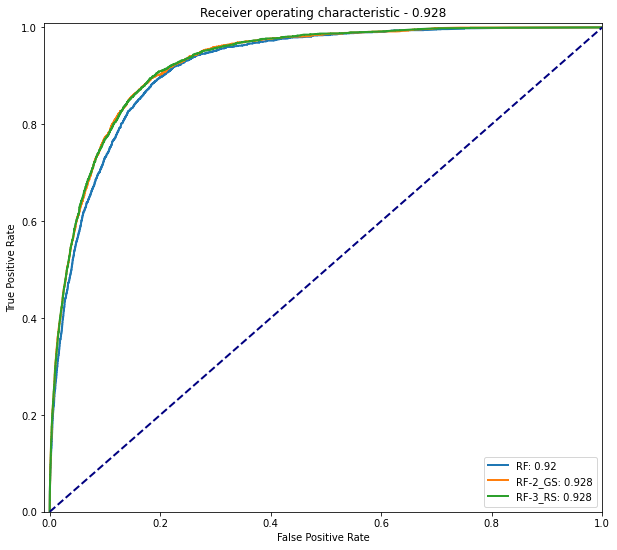

AAB    0.003421
AAC    0.000000
AAE    0.214708
AAL    0.000000
AAP    0.056364
         ...   
zze    0.419730
zzl    0.036951
zzr    0.098378
zzs    0.000000
zzz    0.000000
Length: 39427, dtype: float64

In [9]:
# Prepare data for the AUC-ROC curve
res2plot = []
true = preproc_train_df[target].sort_index()
for result in [model_RF_1, model_RF_2, model_RF_3]:
    pred = pd.Series(sum(result["predictions"], []), index=sum(result["indices"], [])).sort_index()
    res2plot.append((true, pred, result["name"]))

# Plot AUC-ROC curves
plot_roc_auc(res2plot)